#Import

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn import metrics
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from google.colab import drive


import seaborn as sns

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


#Functions

In [5]:
def info_col_1 (df, col_r, t_col):
    col_n = df[col_r]
    mean = round(col_n.mean(), 2)
    mode = col_n.mode()[0]
    median = col_n.median()

    if t_col == 1:
        per_n = col_n.value_counts(normalize = True)
        print (f'Значення у відсотках:{per_n}')


    qua = col_n.quantile(q = [0.25,0.5,0.75, 0.99, 1])
    null_percentage_1 = round((col_n.isnull().sum()/df.shape[0])*100, 2)


    print (f'Середнє значення: {mean}')
    print (f'Мода: {mode}')
    print (f'Медіана: {median}')
    print (f'Персентилі:{qua}')
    print (f'Відсоток пропущених значень:{null_percentage_1}')
    sns.boxplot(col_n)
    plt.show()

    return

def mean_chek (df):
    chek = round((df['Mnt']/df['S_purshcase']),0)

    return chek

# Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


##Завантаження та огляд даних

**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [6]:
path_to = '/content/drive/MyDrive/Python/ML/DATA/marketing_campaign - marketing_campaign.csv'

In [7]:
#зчитування даних
df = pd.read_csv(path_to)

In [8]:
#огляд даних
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [9]:
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#Заповнення пропущених даних

**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [10]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
4,Income,24,1.07
0,ID,0,0.00
15,NumDealsPurchases,0,0.00
27,Z_Revenue,0,0.00
26,Z_CostContact,0,0.00
25,Complain,0,0.00
24,AcceptedCmp2,0,0.00
23,AcceptedCmp1,0,0.00
22,AcceptedCmp5,0,0.00
21,AcceptedCmp4,0,0.00


єдина колонка, яка має відсутні значення - 'Income'  і відсутні 1.07%. Проавналізуємо цей стовпець для прийняття рішення з обробки відсутніх значень

Середнє значення: 52247.25
Мода: 7500.0
Медіана: 51381.5
Персентилі:0.25     35303.0
0.50     51381.5
0.75     68522.0
0.99     94458.8
1.00    666666.0
Name: Income, dtype: float64
Відсоток пропущених значень:1.07


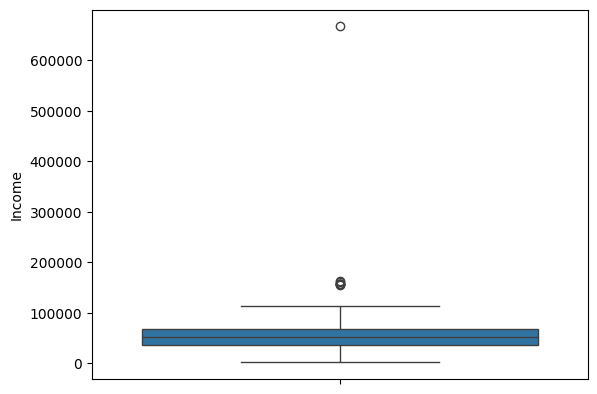

In [11]:
#назва колонки
col_r = 'Income'
# тип колонки, якщо дискретна, то "1"
t_col = 0
info_col_1 (df, col_r, t_col)

Як видно з блокспота є викиди в великих значеннях. Проаналізуємо показники данних стовпця 'Income',коли дані без викидів.

In [12]:
df[df['Income']<= 94458.8].Income.describe()

,Income
count,2193.000000
mean,51308.045144
std,20400.747953
min,1730.000000
25%,34984.000000
50%,51111.000000
75%,67893.000000
max,94384.000000


У нас в усьому датафреймі відсутні значення лише в одній колонці. Відсутні значення складають 1.07%.
В колонці є викиди, а також медіана не хзбігається з середнім. Дохід клієнта є суттєвою ознакою при аналізі клієнтської бази.
Приймаю рішення видалити дані про клієнтів, щодо яких відсутня інформація про дохід.

In [13]:
# Видалення рядків, де Income є NaN
df = df.dropna(subset=['Income'])

**Висновки:** Відсутні значення становили 1.07% даних по одній з колонок і їх було видалено.

#Обробка типів даних

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

##Категоріальні

**ID** Наразі тип даних int, але по суті це має бути str.

In [14]:
#перетворюємо на category
df['ID'] = df['ID'].astype('str')

**Education**

In [15]:
#аналізуємо колонку
df.Education.value_counts(normalize=True)

,proportion
Education,
Graduation,0.503610
PhD,0.217058
Master,0.164711
2n Cycle,0.090253
Basic,0.024368


Метод K-means не вміє обробляти дані типу object. Тому до даних колонки 'Education' застосую OneHot Encoder.

In [16]:
# Використання One-Hot Encoding
df = pd.get_dummies(df, columns=['Education'], drop_first=False)

**Marital_Status**

In [17]:
#аналізуємо колонку
df.Marital_Status.value_counts(normalize=True)

,proportion
Marital_Status,
Married,0.386733
Together,0.258574
Single,0.212545
Divorced,0.104693
Widow,0.034296
Alone,0.001354
Absurd,0.000903
YOLO,0.000903


Метод K-means не вміє обробляти дані типу object. Тому до даних колонки 'Marital_Statu' застосую OneHot Encoder.

In [18]:
# Використання One-Hot Encoding
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=False)

##Дата

**Dt_Customer**

In [19]:
df.Dt_Customer.head(5)

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014


Тип колонки 'Dt_Customer' змінюю на  тип 'datetime' з правильним форматом.

In [20]:
# Перетворення колонки 'Dt_Customer' на тип 'datetime' з правильним форматом
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

##Boolian

Перевіримо, чи всі заявлені колонки як boolean мають відповідні значення

In [21]:
column_bool=['Complain', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df[column_bool].describe()

,Complain,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.009477,0.064079,0.013538,0.073556,0.074007,0.073105,0.150271
std,0.096907,0.244950,0.115588,0.261106,0.261842,0.260367,0.357417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Всі значення відповідають заявленим.

In [22]:
columns_bool = df.columns[df.dtypes == 'bool'].tolist()

for col in columns_bool:
    df[col] = df[col].astype('int64')

##Доповнення даних


У нас є розділ з витратами на певні групи товарів. Вважаю, що дані можна доповнити колонкою Витрати загальні ('Mnt').


In [23]:
#Додаємо колонку 'Mnt'
df['Mnt'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


 У нас є можливість розрахувати кількість покупок ('S_purshcase')

In [24]:
#Додаємо колонку 'S_purshcase'
df['S_purshcase'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['S_purshcase'] = df['S_purshcase'].astype('int64')

#KMeans без масштабування

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

Підготовка даних для KMeans

In [25]:
#Виводимо колонкиБ щоб обрати в датафрейм на кластеризацію всі, окрім 'ID' та 'Dt_Customer' (оскільки KMeans не сприймає дані не в числовому форматі)
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Mnt', 'S_purshcase'],
      dtype='object')

In [26]:
columns_for_task = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Mnt', 'S_purshcase']
X_kmean=df[columns_for_task]

In [27]:
# Визначаємо модель за заданими параметрами
kmeans = KMeans(n_clusters=3, n_init='auto')
#тренуємо модель
kmeans.fit(X_kmean)
labels = kmeans.predict(X_kmean)

In [28]:
#Рахуємо метрику силуету для цієї кластеризації
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_kmean, labels, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.61


#Візуалізація Kmeans без масштабування

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [29]:
# Візуалізація
fig = px.scatter_3d(X_kmean, x='Mnt', y='Income', z='Year_Birth',
              color= labels)
fig.show()

#Kmeans з масштабуванням

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [30]:
# Масштабування даних
scaler = MinMaxScaler()
scaler.fit(X_kmean)
X_kmean_sc = scaler.transform(X_kmean)

# Перетворення назад у DataFrame
X_kmean_sc_df = pd.DataFrame(X_kmean_sc, columns=X_kmean.columns)

In [31]:
# Визначаємо модель за заданими параметрами
kmeans_sc = KMeans(n_clusters=3, n_init='auto')
#тренуємо модель
kmeans_sc.fit(X_kmean_sc_df)
labels_sc = kmeans_sc.predict(X_kmean_sc_df)

In [32]:
#Рахуємо метрику силуету для цієї кластеризації
centroids = kmeans_sc.cluster_centers_
s = metrics.silhouette_score(X_kmean_sc_df, labels_sc, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.10


In [33]:
colu = ['Year_Birth', 'Income',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Mnt', 'S_purshcase']

In [34]:
# Візуалізація

fig = px.scatter_3d(X_kmean_sc_df, x='Income', y='Mnt', z='Year_Birth',
              color= labels_sc)
fig.show()

#Робота з викидами

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

**Аналіз даних на викиди**

Year_Birth


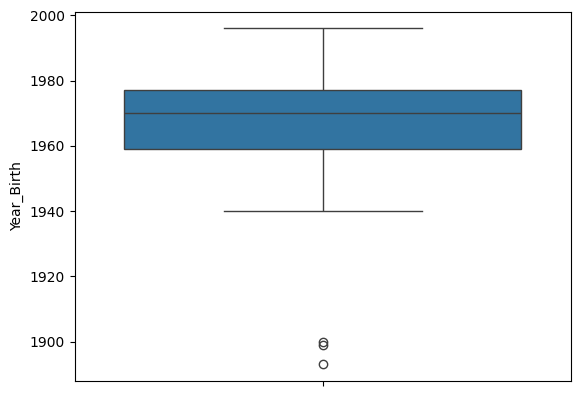

Income


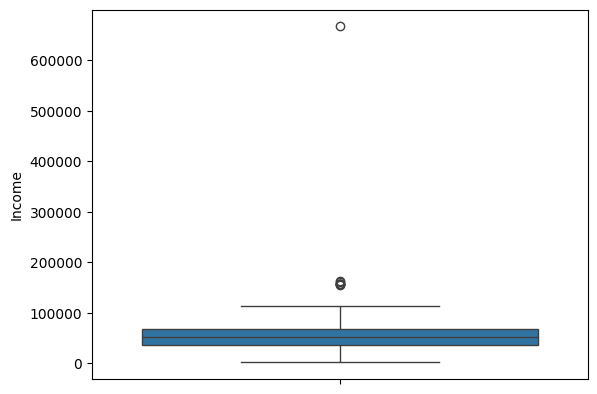

Kidhome


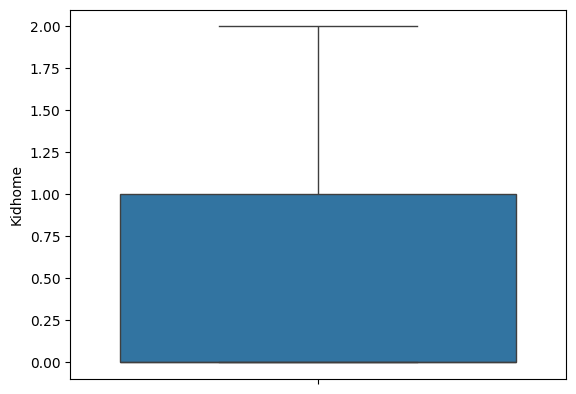

Teenhome


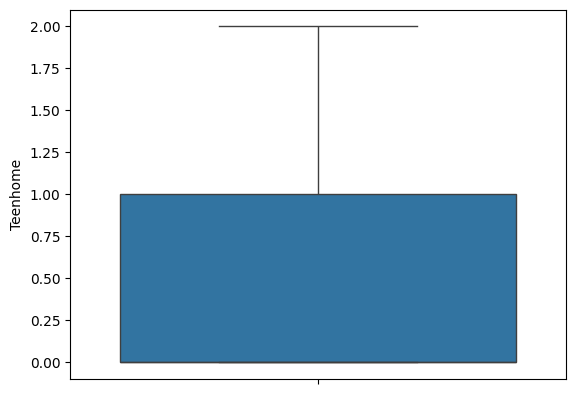

Recency


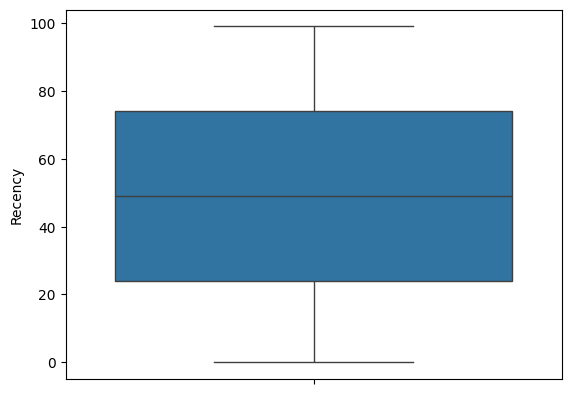

MntWines


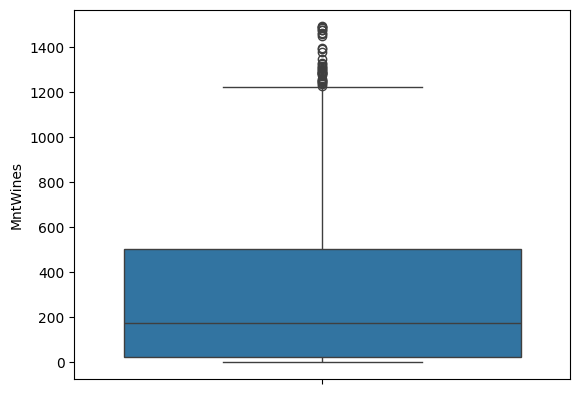

MntFruits


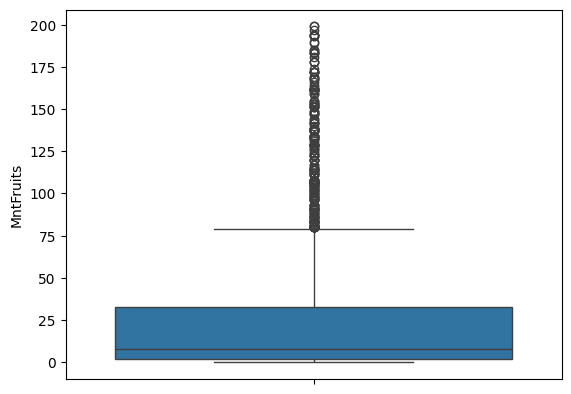

MntMeatProducts


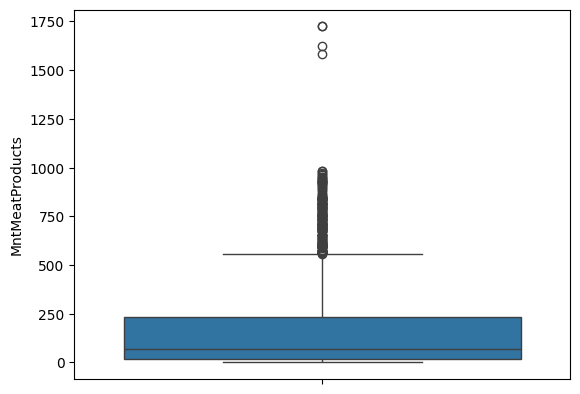

MntFishProducts


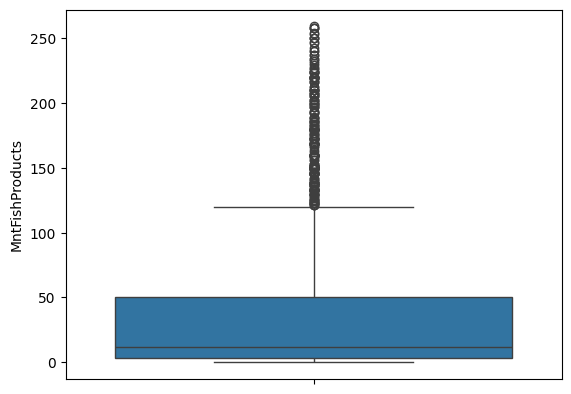

MntSweetProducts


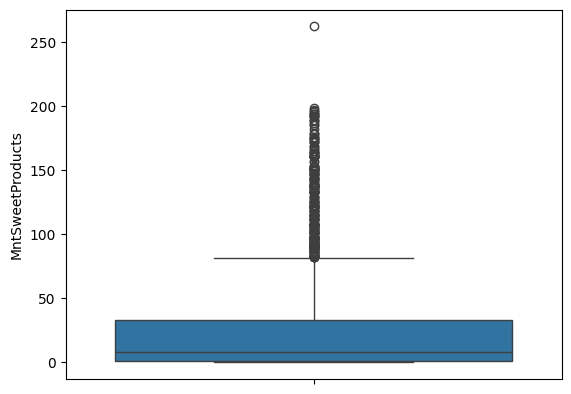

MntGoldProds


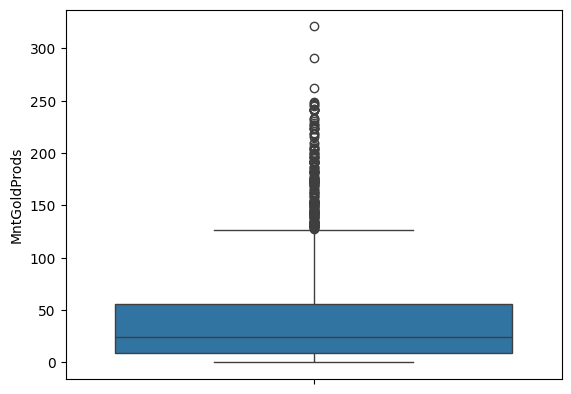

NumDealsPurchases


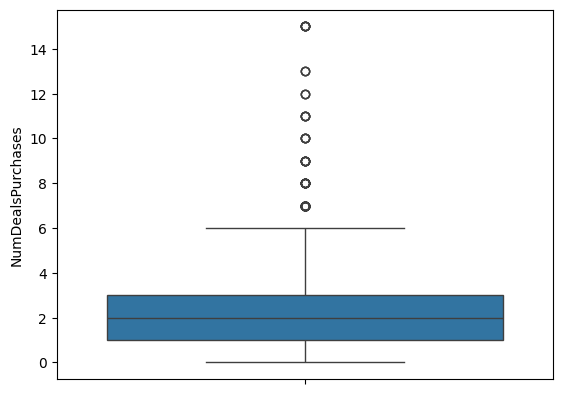

NumWebPurchases


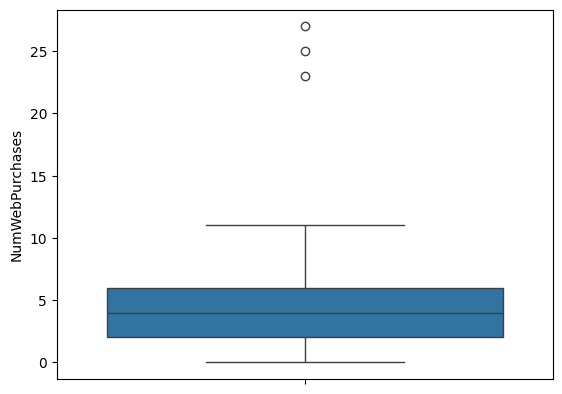

NumCatalogPurchases


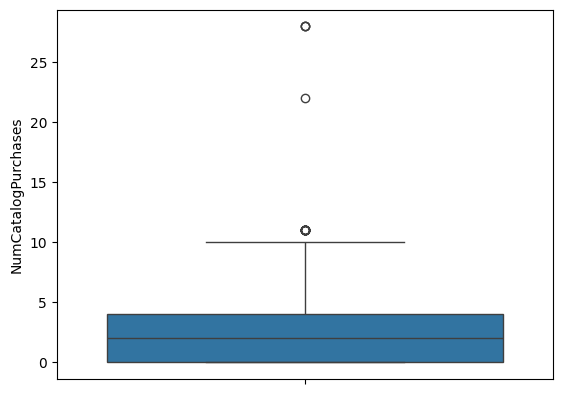

NumStorePurchases


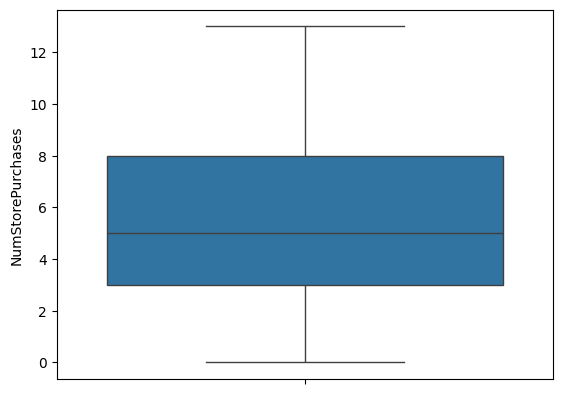

NumWebVisitsMonth


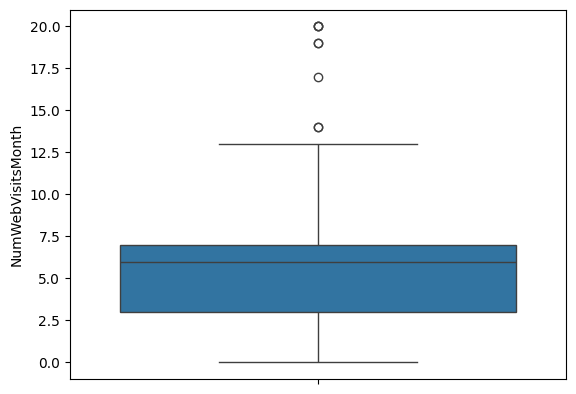

AcceptedCmp3


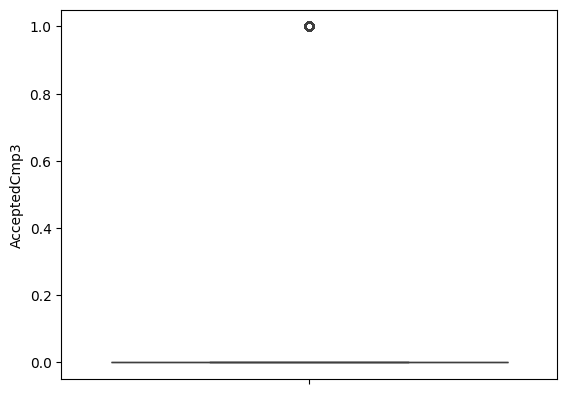

AcceptedCmp4


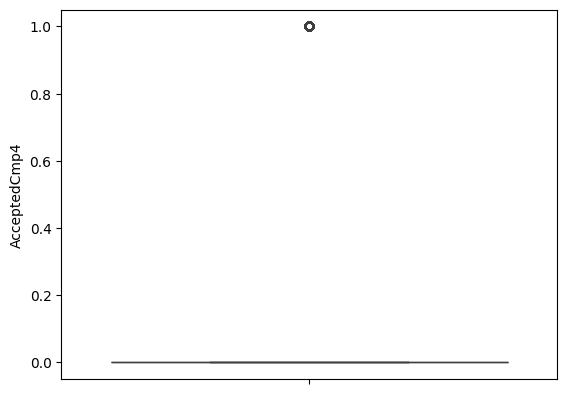

AcceptedCmp5


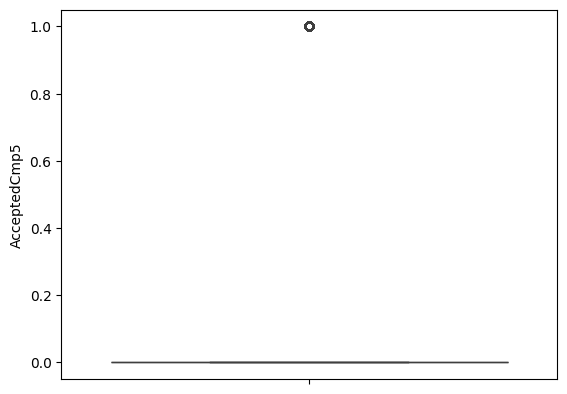

AcceptedCmp1


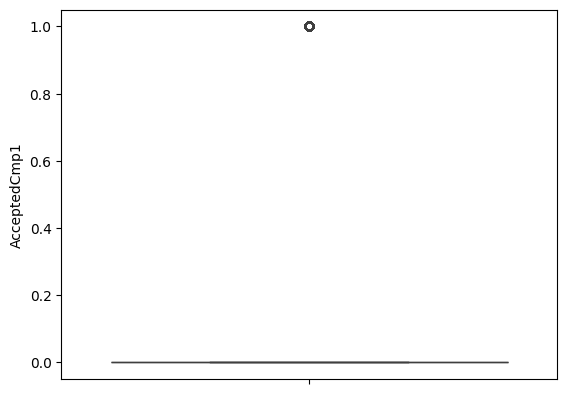

AcceptedCmp2


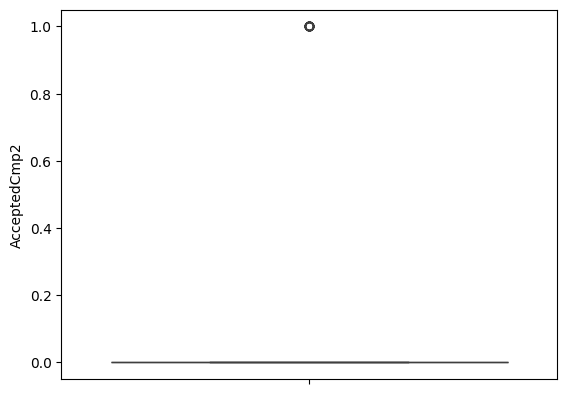

Complain


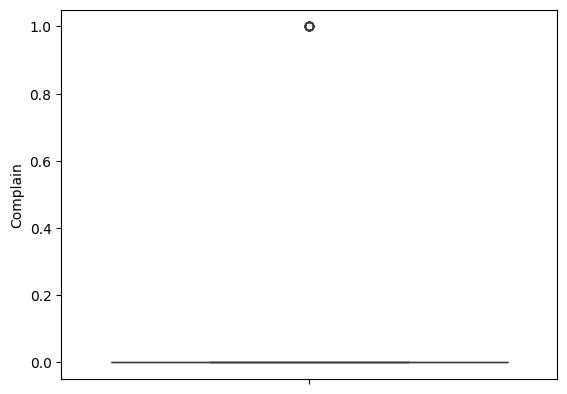

Z_CostContact


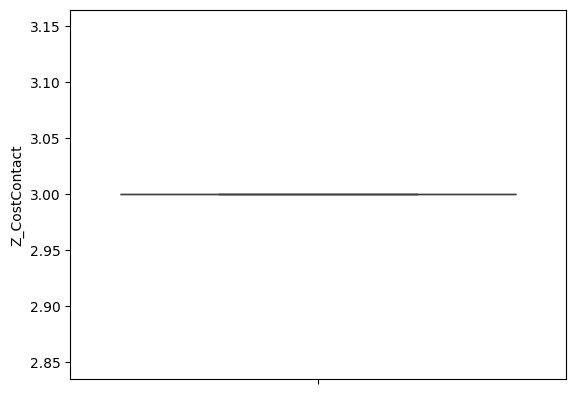

Z_Revenue


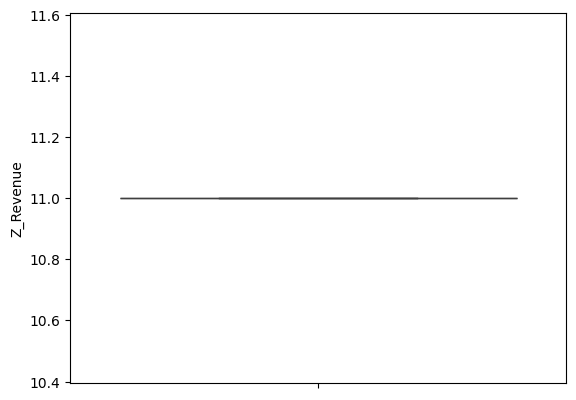

Response


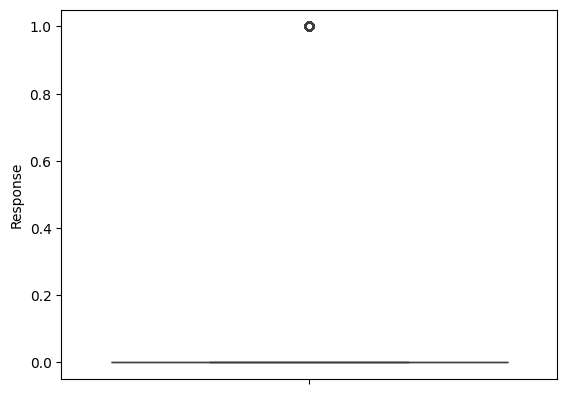

Education_2n Cycle


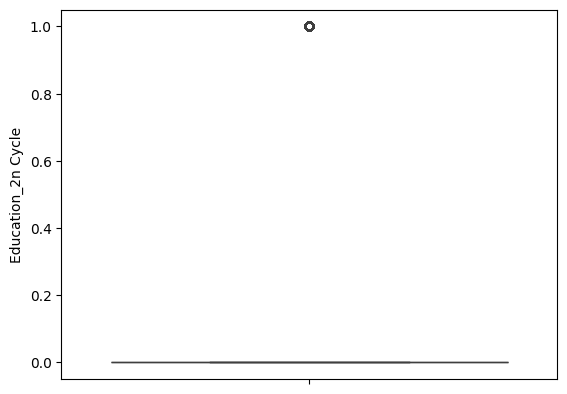

Education_Basic


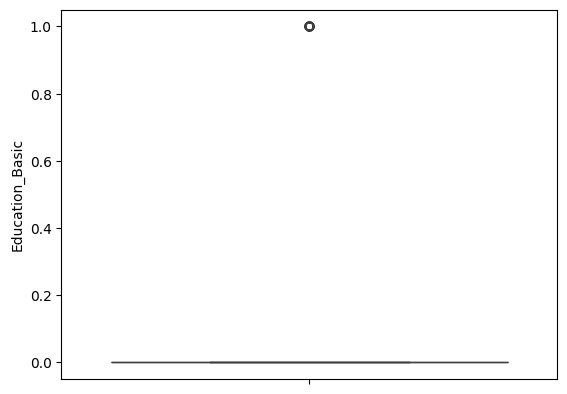

Education_Graduation


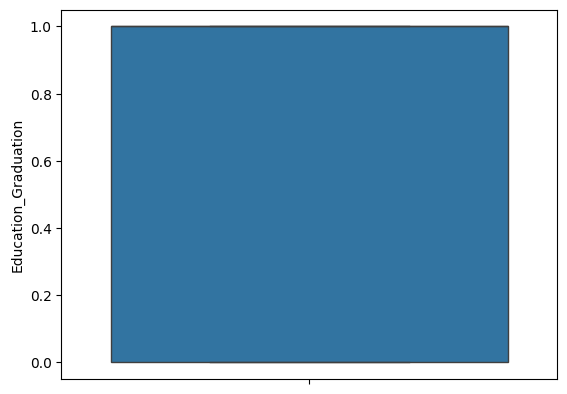

Education_Master


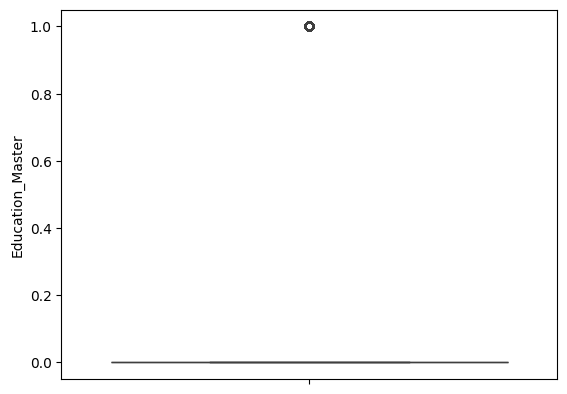

Education_PhD


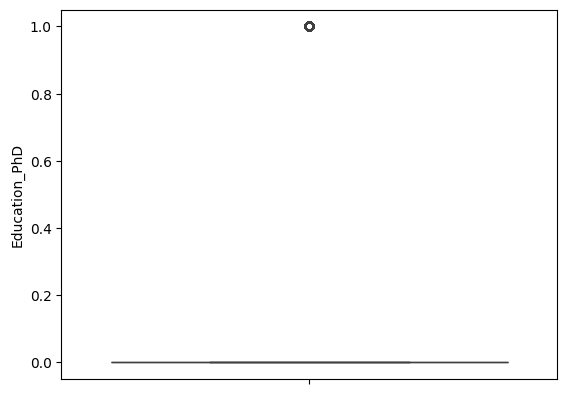

Marital_Status_Absurd


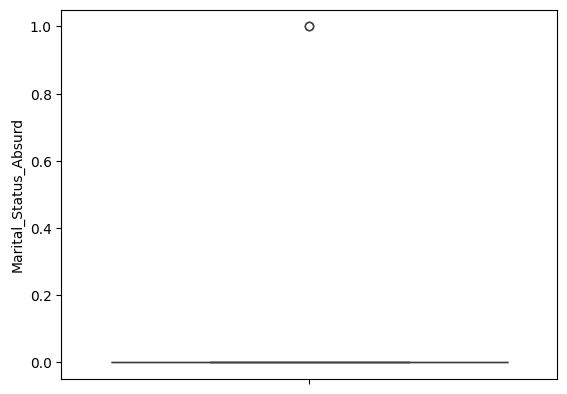

Marital_Status_Alone


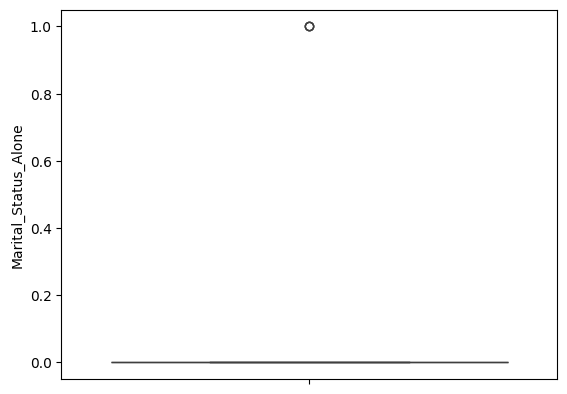

Marital_Status_Divorced


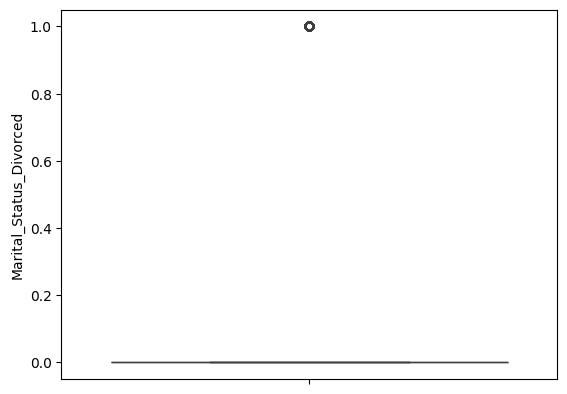

Marital_Status_Married


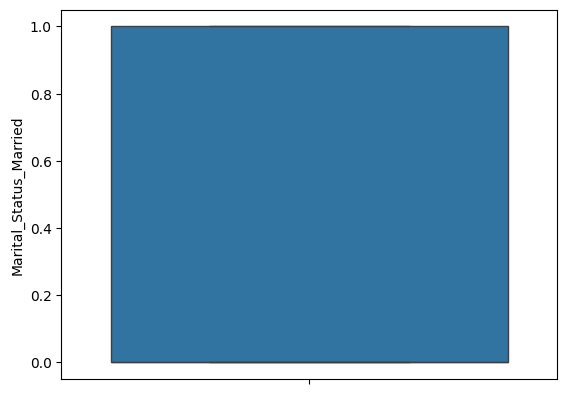

Marital_Status_Single


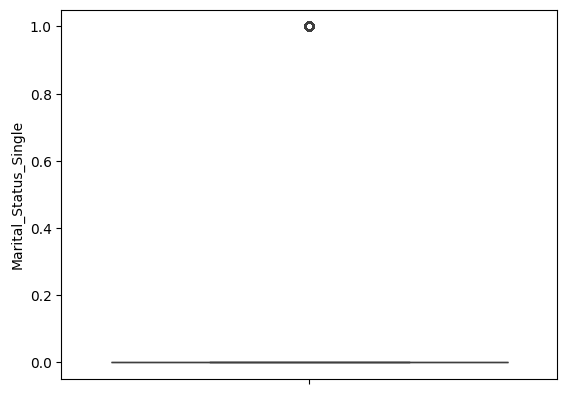

Marital_Status_Together


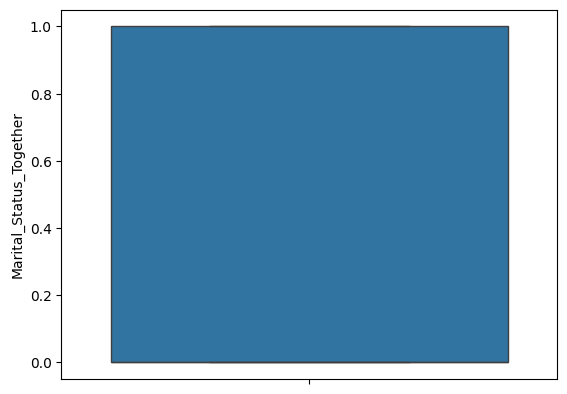

Marital_Status_Widow


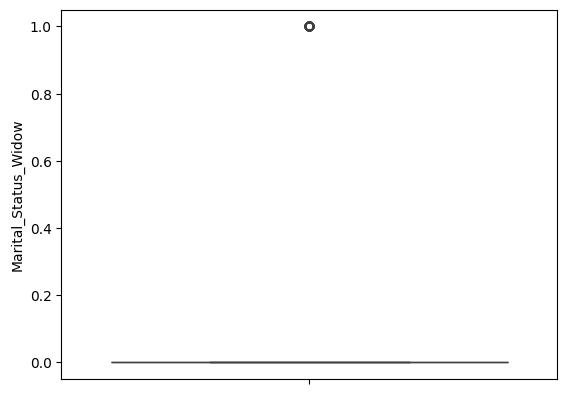

Marital_Status_YOLO


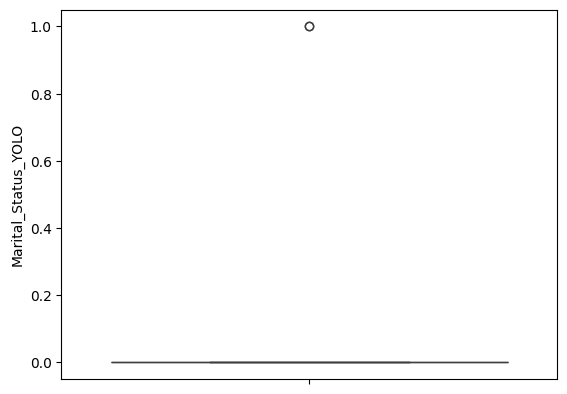

Mnt


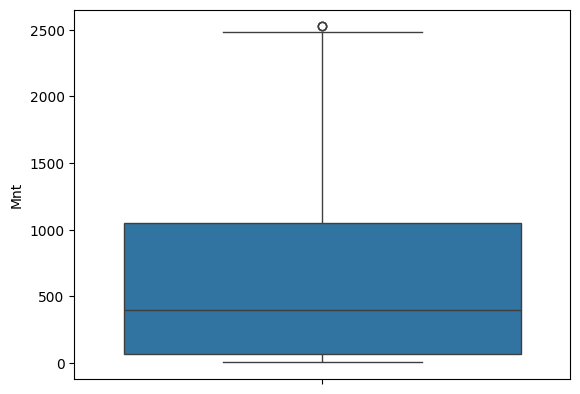

S_purshcase


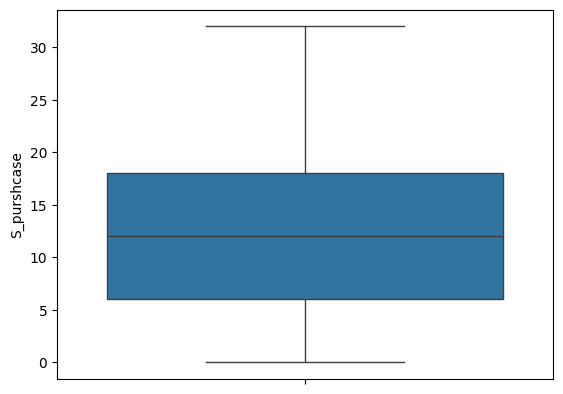

In [35]:
colum = X_kmean.columns.tolist()
for col in colum:
    print(col)
    sns.boxplot(X_kmean[col])
    plt.show()

Як можемо бачити ,значна кількість викидів є в колонках: 'Year_birht', 'Income', 'NumWebVisitsMonth', 'NumDealsPurchases' та в продажах за окремими категоріями товарів.

**Income**

Середнє значення: 52247.25
Мода: 7500.0
Медіана: 51381.5
Персентилі:0.25     35303.0
0.50     51381.5
0.75     68522.0
0.99     94458.8
1.00    666666.0
Name: Income, dtype: float64
Відсоток пропущених значень:0.0


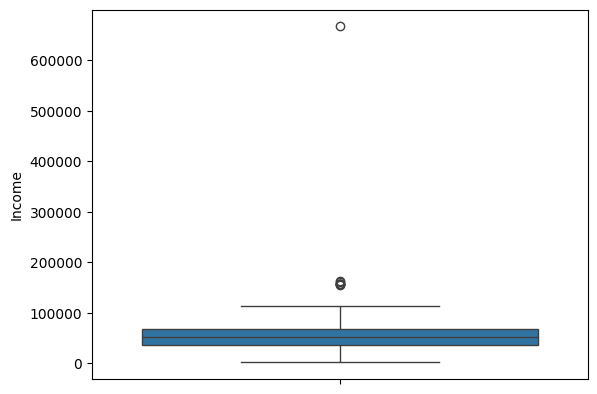

In [36]:
#назва колонки
col_r = 'Income'
# тип колонки, якщо дискретна, то "1"
t_col = 0
info_col_1 (df, col_r, t_col)

Середнє значення: 51512.05
Мода: 7500.0
Медіана: 51250.0
Персентилі:0.25    35187.00
0.50    51250.00
0.75    68134.00
0.99    92156.14
1.00    98777.00
Name: Income, dtype: float64
Відсоток пропущених значень:0.0


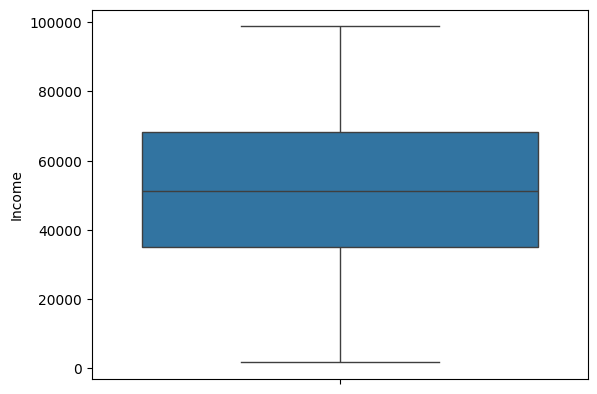

In [37]:
#Огляд даних без викидів
df_in = df[df['Income']< 100000]
info_col_1 (df_in, col_r, t_col)

In [38]:
#перевіряємо скільки рядків даних становлять викиди
df[df['Income']>= 100000].Income.count()

13

Викиди по стовпцю 'Income' становлять 0.58%. Проаналізуємо чи це помилкові дані. Для цього виокремимо в інший датафрейм і переглянемо інші показники по цим покупцям

In [39]:
df_vip = df[df['Income']>= 100000]
df_vip.describe()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Mnt,S_purshcase
count,13.000000,13.000000,13.000000,13.000000,13,13.000000,13.000000,13.000000,13.000000,13.000000,...,13.0,13.0,13.000000,13.000000,13.000000,13.000000,13.0,13.0,13.000000,13.000000
mean,1971.461538,176835.615385,0.230769,0.153846,2013-06-13 18:27:41.538461440,43.230769,221.538462,32.538462,443.538462,29.923077,...,0.0,0.0,0.153846,0.230769,0.153846,0.461538,0.0,0.0,829.615385,17.461538
min,1945.000000,101970.000000,0.000000,0.000000,2012-08-04 00:00:00,5.000000,1.000000,0.000000,1.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,6.000000,0.000000
25%,1971.000000,105471.000000,0.000000,0.000000,2013-03-12 00:00:00,21.000000,6.000000,1.000000,9.000000,1.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,62.000000,2.000000
50%,1975.000000,156924.000000,0.000000,0.000000,2013-06-02 00:00:00,36.000000,39.000000,2.000000,102.000000,2.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1112.000000,26.000000
75%,1977.000000,157733.000000,0.000000,0.000000,2013-08-29 00:00:00,69.000000,168.000000,27.000000,444.000000,32.000000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.0,1608.000000,28.000000
max,1983.000000,666666.000000,1.000000,1.000000,2014-05-28 00:00:00,98.000000,1009.000000,181.000000,1725.000000,202.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1730.000000,30.000000
std,11.493588,149502.091917,0.438529,0.375534,NaN,31.147910,356.373076,59.815850,694.614115,56.471913,...,0.0,0.0,0.375534,0.438529,0.375534,0.518875,0.0,0.0,747.740991,12.965437


Вважаю, що можемо залишити даний датафрейм для окремого аналізу даної групи.


**NumDealsPurchases**

Значення у відсотках:NumDealsPurchases
1     0.433213
2     0.222473
3     0.132220
4     0.084838
5     0.042419
6     0.027076
0     0.019856
7     0.017599
8     0.006318
9     0.003610
15    0.003159
10    0.002256
11    0.002256
13    0.001354
12    0.001354
Name: proportion, dtype: float64
Середнє значення: 2.32
Мода: 1
Медіана: 2.0
Персентилі:0.25     1.00
0.50     2.00
0.75     3.00
0.99     9.85
1.00    15.00
Name: NumDealsPurchases, dtype: float64
Відсоток пропущених значень:0.0


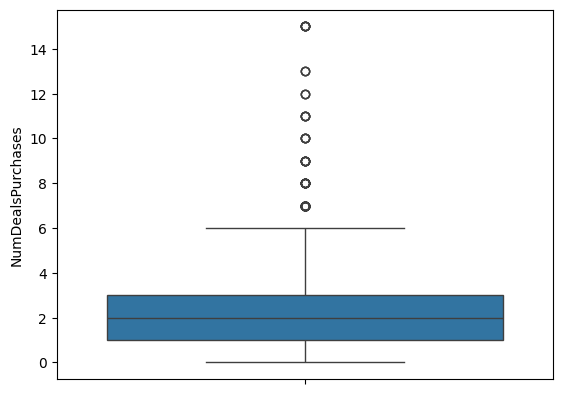

In [40]:
#назва колонки
col_r = 'NumDealsPurchases'
info_col_1 (df, col_r, t_col=1)

In [41]:
#перевіряємо скільки рядків даних становлять викиди
df[df['NumDealsPurchases']>= 9.85].NumDealsPurchases.count()

23

Викиди становлять 1%. Тобто це клієнти, які дуже багато купують саме по акціям. Вважаю, що їх потрібно виділити в окремий датафрейм і проаналізувати пізніше

**NumWebVisitsMonth**

Середнє значення: 5.32
Мода: 7
Медіана: 6.0
Персентилі:0.25     3.0
0.50     6.0
0.75     7.0
0.99     9.0
1.00    20.0
Name: NumWebVisitsMonth, dtype: float64
Відсоток пропущених значень:0.0


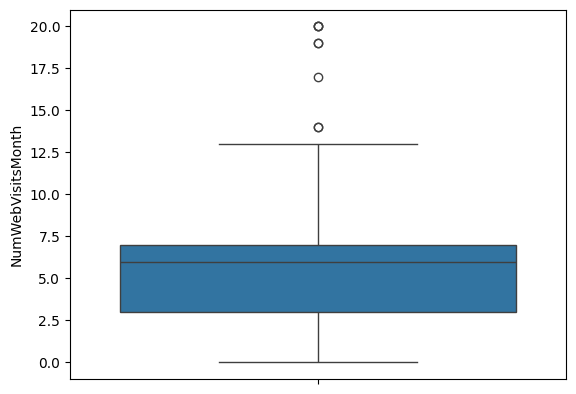

In [42]:
#назва колонки
col_r = 'NumWebVisitsMonth'
info_col_1 (df, col_r, t_col=0)

In [43]:
#перевіряємо скільки рядків даних становлять викиди
df[df['NumWebVisitsMonth']>= 12.5].NumWebVisitsMonth.count()

9

**Year_birth**

Середнє значення: 1968.82
Мода: 1976
Медіана: 1970.0
Персентилі:0.25    1959.0
0.50    1970.0
0.75    1977.0
0.99    1992.0
1.00    1996.0
Name: Year_Birth, dtype: float64
Відсоток пропущених значень:0.0


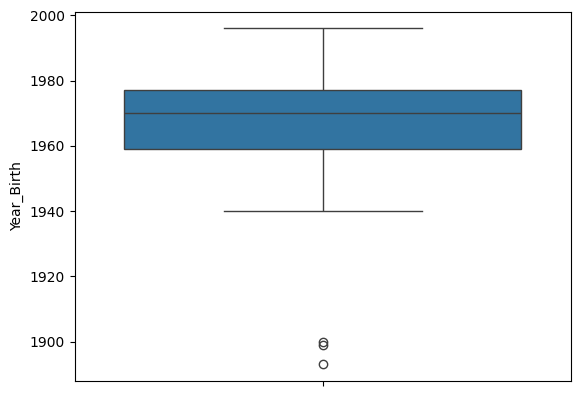

In [44]:
#назва колонки
col_r = 'Year_Birth'
# тип колонки, якщо дискретна, то "1"
t_col = 0
info_col_1 (df, col_r, t_col)

## Датафрейм без викидів

In [45]:
#формуємо основний датафрейм без викидів по колонці 'Income'
df = df[(df['Income']< 100000) & (df['NumDealsPurchases']< 9.85)&(df['NumWebVisitsMonth']< 12.5)&(df['Year_Birth']> 1940)]

## Після прибирання викидів

In [46]:

columns_for_task_n = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Mnt', 'S_purshcase']

X_kmean_n=df[columns_for_task_n].reset_index(drop=True)

**Немасштабовані дані**

In [47]:
# Визначаємо модель за заданими параметрами
kmeans = KMeans(n_clusters=3, n_init='auto')
#тренуємо модель
kmeans.fit(X_kmean_n)
labels_n = kmeans.predict(X_kmean_n)

#Рахуємо метрику силуету для цієї кластеризації
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_kmean_n, labels_n, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

# Візуалізація
fig = px.scatter_3d(X_kmean_n, x='Mnt', y='Income', z='Year_Birth',
              color= labels_n)
fig.show()

Silhouette Coefficient for the data Dataset Clusters: 0.55


**Масштабовані дані**

In [48]:
# Масштабування даних
scaler = MinMaxScaler()
scaler.fit(X_kmean_n)
X_kmean_sc_n = scaler.transform(X_kmean_n)

# Перетворення назад у DataFrame
X_kmean_sc_df_n = pd.DataFrame(X_kmean_sc_n, columns=X_kmean_n.columns)

In [49]:
# Визначаємо модель за заданими параметрами
kmeans_sc_n = KMeans(n_clusters=3, n_init='auto')
#тренуємо модель
kmeans_sc_n.fit(X_kmean_sc_df_n)
labels_sc_n = kmeans_sc_n.predict(X_kmean_sc_df_n)

In [50]:
#Рахуємо метрику силуету для цієї кластеризації
centroids = kmeans_sc_n.cluster_centers_
s = metrics.silhouette_score(X_kmean_sc_df_n, labels_sc_n, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.11


In [51]:
# Візуалізація

fig = px.scatter_3d(X_kmean_sc_df_n, x= 'Mnt', y='Income', z='Year_Birth',
              color= labels_sc_n)
fig.show()

**Висновки:** Кращі результати класифікації на немасштабованих данних. Робота з викидами покращила кластеризацію на 0.01

#Elbow method

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

Немасштабовані дані без викидів

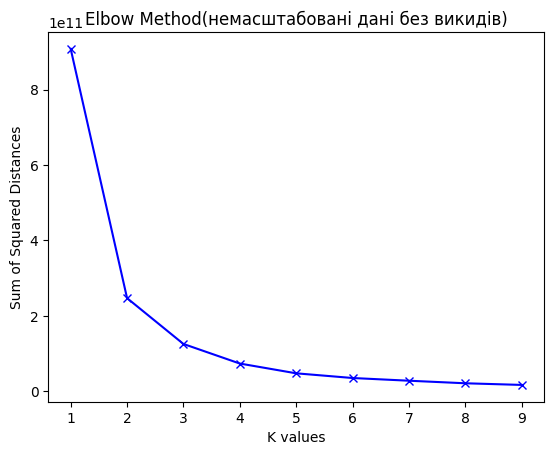

In [52]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_kmean_n)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method(немасштабовані дані без викидів)')
plt.show()

Масштабовані дані без викидів

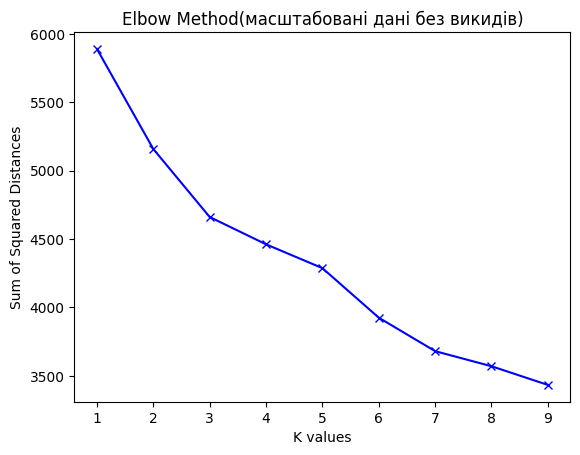

In [53]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_kmean_sc_n)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method(масштабовані дані без викидів)')
plt.show()

**Висновки:** Немасштабований набір даних без викидів показав кращі результати при використанні  Elbow Method та рекомендовано ділити на 2 кластери

In [54]:
# Визначаємо модель за заданими параметрами
kmeans = KMeans(n_clusters=2, n_init='auto')
#тренуємо модель
kmeans.fit(X_kmean_n)
labels_2 = kmeans.predict(X_kmean_n)

#Рахуємо метрику силуету для цієї кластеризації
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_kmean_n, labels_2, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.62


In [55]:
# Візуалізація
fig = px.scatter_3d(X_kmean_n, x='Mnt', y='Income', z='Year_Birth',
              color= labels_2)
fig.show()

#scipy dendrogram, linkage, fcluster

**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

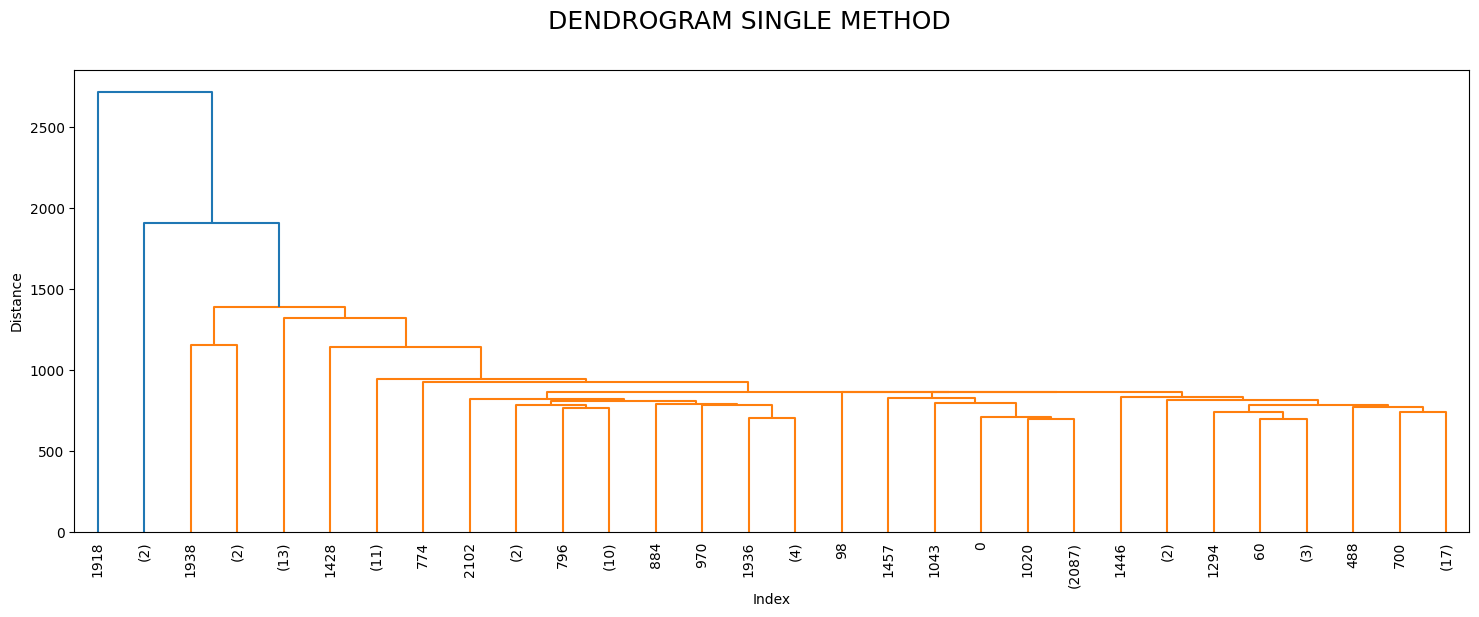

In [56]:
dist_sin = linkage(X_kmean_n, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [57]:
X_kmean_n['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_kmean_n['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

<Axes: title={'center': 'K = 3'}, xlabel='Mnt', ylabel='Income'>

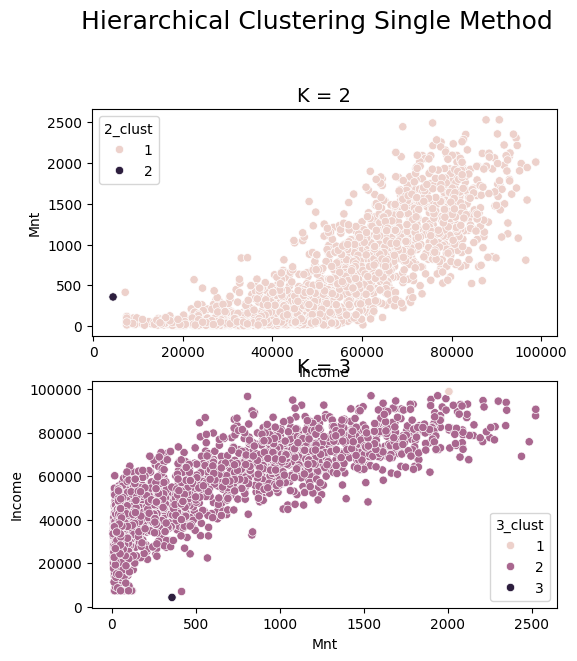

In [58]:
import seaborn as sns

plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="Mnt", data=X_kmean_n, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Mnt",y="Income", data=X_kmean_n, hue="3_clust")



In [59]:
#Рахуємо метрику силуету для  кластеризації на 2 кластера
# Отримуємо мітки кластерів
labels_n2 = fcluster(dist_sin, t=2, criterion='maxclust')

# Обчислюємо центроїди кластерів
centroids = np.array([X_kmean_n[labels_n2 == i].mean(axis=0) for i in np.unique(labels_n2)])

# Розраховуємо метрику силуету
s = metrics.silhouette_score(X_kmean_n, labels_n2, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.40


In [60]:
#Рахуємо метрику силуету для цієї кластеризації на 3 кластера
# Отримуємо мітки кластерів
labels_n = fcluster(dist_sin, t=3, criterion='maxclust')

# Обчислюємо центроїди кластерів
centroids = np.array([X_kmean_n[labels_n == i].mean(axis=0) for i in np.unique(labels_n)])

# Розраховуємо метрику силуету
s = metrics.silhouette_score(X_kmean_n, labels_n, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.15


**Висновки:** 2 кластери на немасштабованих даних показали кращий результат. Даний метод кластеризації показав гірші результати (0.40), аніж Kmeans (0.62).

#Додаткові методи кластеризації

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

## Ієрархічна кластеризація (average)

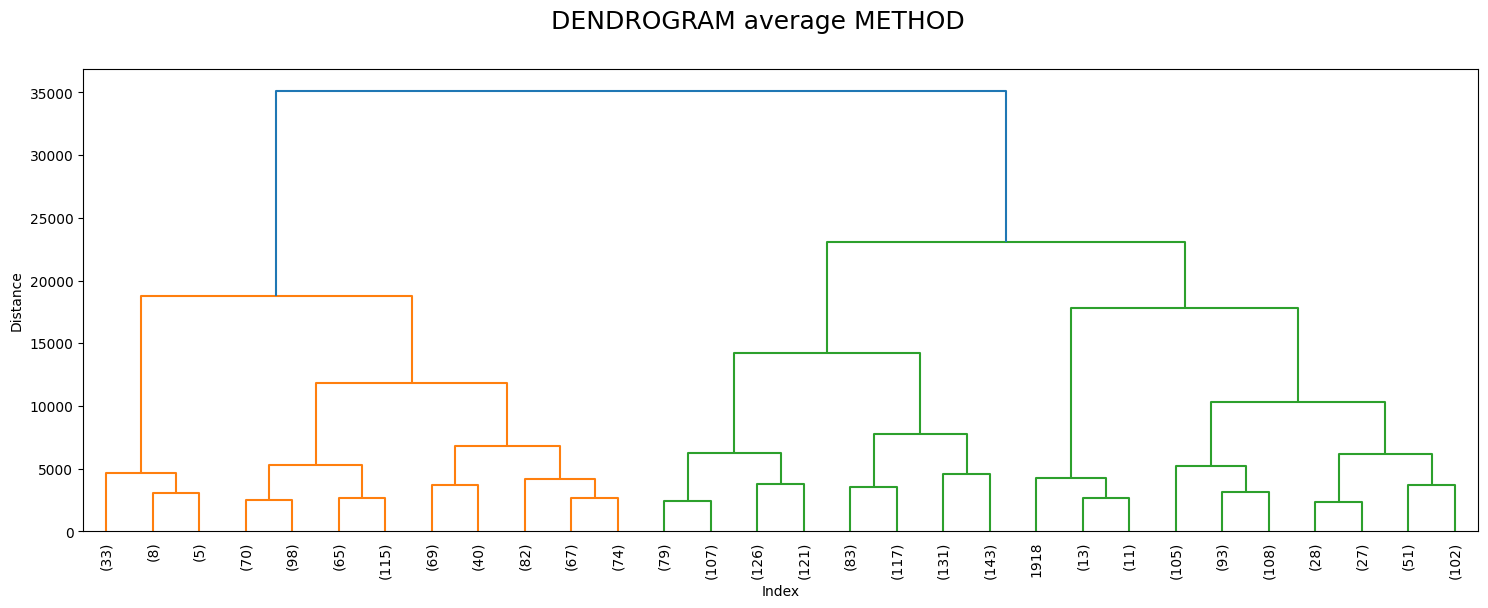

<Axes: title={'center': 'K = 3'}, xlabel='Mnt', ylabel='Income'>

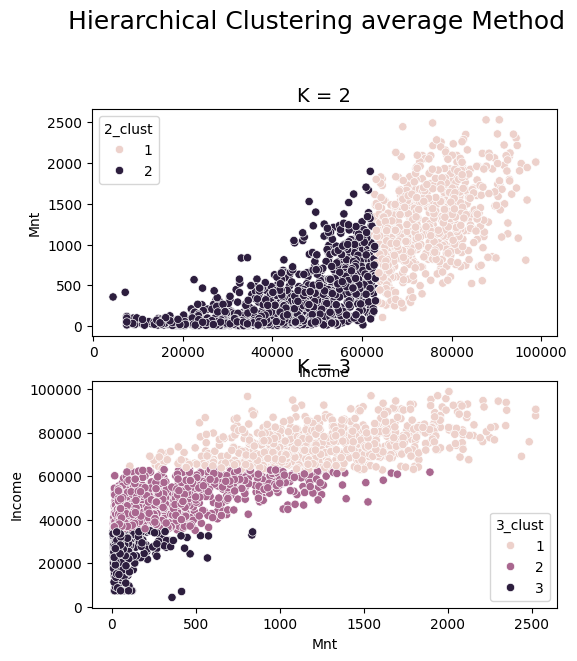

In [185]:
dist_com = linkage(X_kmean_n, method="average")
plt.figure(figsize=(18,6))
dendrogram(dist_com, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM average METHOD",fontsize=18)
plt.show()

X_kmean_n['2_clust'] = fcluster(dist_com, 2, criterion='maxclust')
X_kmean_n['3_clust'] = fcluster(dist_com, 3, criterion='maxclust')



plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering average Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="Mnt", data=X_kmean_n, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Mnt",y="Income", data=X_kmean_n, hue="3_clust")



In [182]:
#Рахуємо метрику силуету для цієї кластеризації
# Отримуємо мітки кластерів
labels_com2 = fcluster(dist_com, t=2, criterion='maxclust')

# Обчислюємо центроїди кластерів
centroids = np.array([X_kmean_n[labels_com2 == i].mean(axis=0) for i in np.unique(labels_com2)])

# Розраховуємо метрику силуету
s = metrics.silhouette_score(X_kmean_n, labels_com2, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset 2 Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset 2 Clusters: 0.56


In [183]:
#Рахуємо метрику силуету для цієї кластеризації
# Отримуємо мітки кластерів
labels_com = fcluster(dist_com, t=3, criterion='maxclust')

# Обчислюємо центроїди кластерів
centroids = np.array([X_kmean_n[labels_com == i].mean(axis=0) for i in np.unique(labels_com)])

# Розраховуємо метрику силуету
s = metrics.silhouette_score(X_kmean_n, labels_com, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset 3 Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset 3 Clusters: 0.54


При ієрархічній кластеризації (average) при двох кластерах становить 0.56. Це не найкраща модель кластеризації для цих даних.

##DBSCAN

In [156]:
dbscan = DBSCAN(eps=0.9, min_samples=10)
dbscan.fit(X_kmean_sc)
labels_dbs = dbscan.labels_
n_clusters_ = len(set(labels_dbs)) - (1 if -1 in labels_dbs else 0)
n_noise_ = list(labels_dbs).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

s = metrics.silhouette_score(X_kmean_sc, dbscan.labels_)
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')


Estimated number of clusters: 25
Estimated number of noise points: 634
Silhouette Coefficient for the data Dataset Clusters: 0.15


**Висновки:** Дана модель показала погані результати з кластеризації заданого набору даних. На масштабованих даних з викидами - найкращі результати і це 0.15

##K-Medians

In [160]:
pip install scikit-learn-extra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.9 MB/s eta 0:00:00


In [161]:
from sklearn_extra.cluster import KMedoids

In [170]:
kmedoids = KMedoids(n_clusters=2, metric='euclidean', random_state=0)
kmedoids.fit(X_kmean_n)

# Get the cluster labels
labels_med = kmedoids.labels_
#Рахуємо метрику силуету для цієї кластеризації
centroids = kmedoids.cluster_centers_
s = metrics.silhouette_score(X_kmean_n, labels_med, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.2f}')

Silhouette Coefficient for the data Dataset Clusters: 0.62


In [186]:
# Візуалізація
fig = px.scatter_3d(X_kmean_n, x='Mnt', y='Income', z='Year_Birth',
              color= labels_med)
fig.show()

Це найкраща модель для кластеризації даного набору даних (використано немасштабовані дані без викидів). Враховуючи, що  DBSCAN виявив багато шумів в даних, навітьмасштабованих. На відміну від Kmeans дана модель є більш стійкою до шумів.

#Висновки

1. При кластеризації не була використана колонка дати реєстрації на платформі. Оскільки моделі працюють лише з типом даних int, а я не знайшла дані про рік станом на який сформавано даний датафрейм. Якби була використані дані дати реєтрації, то кластеризація була б більш якісна.
2. Дані про сімейний стан, освіту, використання акцій та інші в кінцевий датафрейм потрапили в фоматі 0 та 1. Це призвело до того, що використання таких колонок при візуалізації було не інформативним. З огляду на це, при оцінці кластеризації орієнтувалась на метрику, а не візуалізацію.
3. Найкраще себе показала модель **KMedoids(n_clusters=2, metric='euclidean', random_state=0)** з показником 0.62.